# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
import numpy as np
import pandas as pd
import os
import pylab as pl
import statsmodels.api as sm
import seaborn as sns

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
df1 = pd.read_csv("https://raw.githubusercontent.com/kpan125/PUI2017_kwp225/master/HW5_kwp225/" + 
                  "World%20firearms%20murders%20and%20ownership.csv", 
                  usecols=['Country/Territory','Average total all civilian firearms','Number of homicides by firearm']
                 ).rename(columns={'Country/Territory':'Country Name'})

df2 = pd.read_csv("https://raw.githubusercontent.com/kpan125/PUI2017_kwp225/master/HW5_kwp225/" + 
                  "API_SP.POP.TOTL_DS2_en_csv_v2.csv", skiprows=4, 
                  usecols=['Country Name','2012']
                 ).rename(columns={'2012':'Pop'})

df3 = pd.read_csv("https://raw.githubusercontent.com/kpan125/PUI2017_kwp225/" + 
                  "master/HW5_kwp225/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows=4,
                  usecols=['Country Name','2012']
                 ).rename(columns={'2012':'GDP'})

df4 = pd.read_csv("https://raw.githubusercontent.com/kpan125/PUI2017_kwp225/master/HW5_kwp225/data-pvLFI.csv")

In [5]:
df_ = df1.merge(df2).merge(df3)
df_ = df_.merge(df4, right_on="Country", left_on="Country Name")
df_.drop(['Country'], axis=1, inplace=True)

In [6]:
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Pop,GDP,Guns/100 inhabitants,Number of mass shootings
0,Australia,30.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,173.0,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,15.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,24.0,2400000.0,5413971.0,2.567065e+11,45.3,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


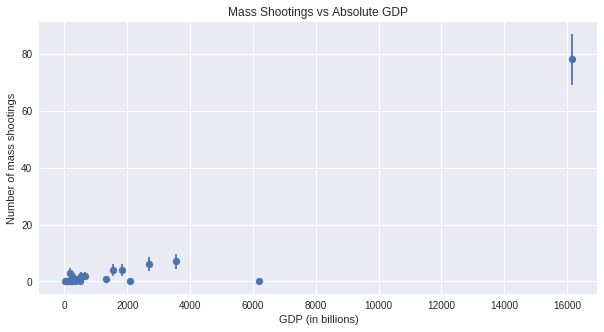

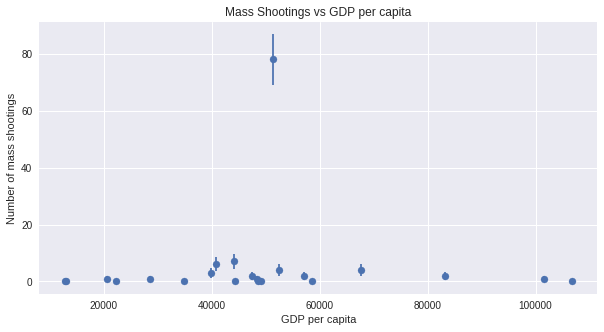

Number of mass shootings vs GDP per capita, errors represent Poisson statistics.
Again, the lone datapoint at the top of the plot is the USA. 
The USA's GDP per person is not a outlier when compared to other countries, but it still has the most number of mass shootings by far.


In [7]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Mass Shootings vs Absolute GDP')
scatter = ax.scatter(df_.GDP / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.GDP / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Mass Shootings vs GDP per capita')
scatter = ax.scatter((df_.GDP/df_.Pop), df_['Number of mass shootings'])
ax.errorbar((df_.GDP/df_.Pop), df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs GDP per capita, " + 
       "errors represent Poisson statistics.\n" + 
       "Again, the lone datapoint at the top of the plot is the USA. \n" + 
       "The USA's GDP per person is not a outlier when compared to other countries," +
       " but it still has the most number of mass shootings by far."
      )

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [8]:
df_['firearmspp'] = df_["Average total all civilian firearms"] / df_['Pop']

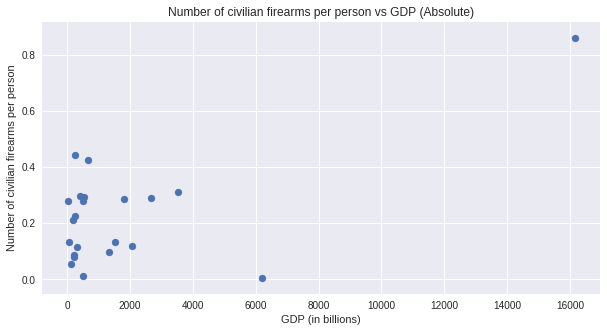

Number of civilian firearms per person vs absolute GDP. 
The datapoint to the top right of the plot is the USA (again), which has both the highest GDP and the highest number of civilian firearms.
It is a signifcant outlier compared to the other countries (again).


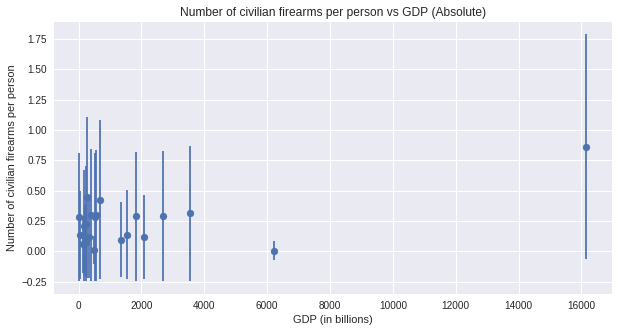

Number of civilian firearms per person vs absolute GDP, errors represent Poisson statistics.


In [9]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of civilian firearms per person vs GDP (Absolute)')
scatter = ax.scatter(df_.GDP / 1e9, df_['firearmspp'])

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Number of civilian firearms per person vs absolute GDP. \n" + 
       "The datapoint to the top right of the plot is the USA (again), " + 
       "which has both the highest GDP and the highest number of civilian firearms.\n" + 
       "It is a signifcant outlier compared to the other countries (again)."
      )

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of civilian firearms per person vs GDP (Absolute)')
scatter = ax.scatter(df_.GDP / 1e9, df_['firearmspp'])
ax.errorbar(df_.GDP / 1e9, df_['firearmspp'], 
            yerr = np.sqrt(df_['firearmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Number of civilian firearms per person vs absolute GDP, " + 
       "errors represent Poisson statistics." )

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [10]:
df_['homicidespp'] = df_["Number of homicides by firearm"] / df_['Pop'] * 1000

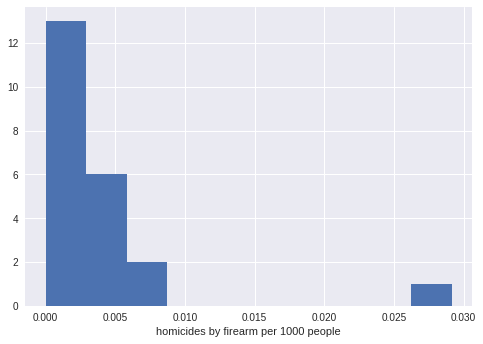

Number of homicides by firearms per 1000 people. The USA represents the one outlying bar on the right of the plot.


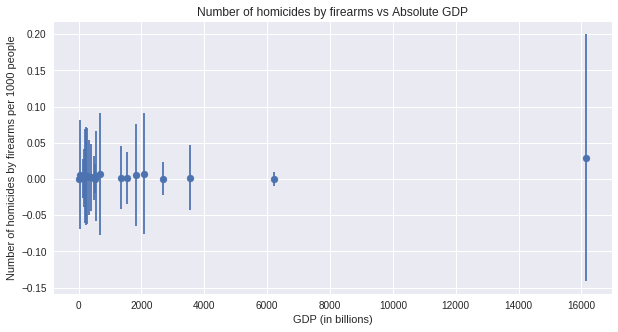

Number of homicides by firearms per 1000 people vs absolute GDP. 
The datapoint to the top right of the plot is the USA (again), which has both the highest GDP and the highest number of homicides by firearms.
It is a signifcant outlier compared to the other countries (again).


In [11]:
fig, ax = pl.subplots()
pl.hist(df_['homicidespp'])
ax.set_xlabel('homicides by firearm per 1000 people')
pl.show()
print("Number of homicides by firearms per 1000 people. " + 
      "The USA represents the one outlying bar on the right of the plot.")

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of homicides by firearms vs Absolute GDP')
scatter = ax.scatter(df_.GDP / 1e9, df_['homicidespp'])
ax.errorbar(df_.GDP / 1e9, df_['homicidespp'], 
            yerr = np.sqrt(df_['homicidespp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearms per 1000 people")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearms per 1000 people vs absolute GDP. \n" + 
       "The datapoint to the top right of the plot is the USA (again), " + 
       "which has both the highest GDP and the highest number of homicides by firearms.\n" + 
       "It is a signifcant outlier compared to the other countries (again)."
      )

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


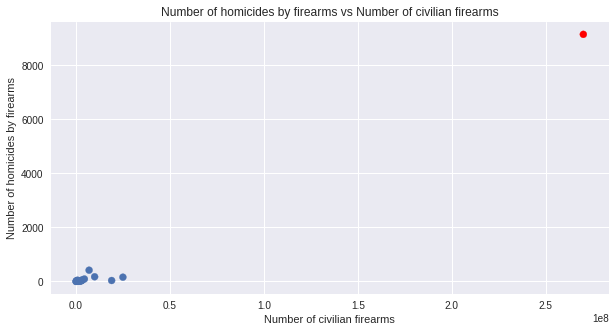

Number of homicides by firearms vs Number of civilian firearms. 
The datapoint to the top right of the plot in the red is the USA, which has both the highest number of civilian firearms and highest number of homicides by firearms.
It is a significant outlier compared to the other countries (again).


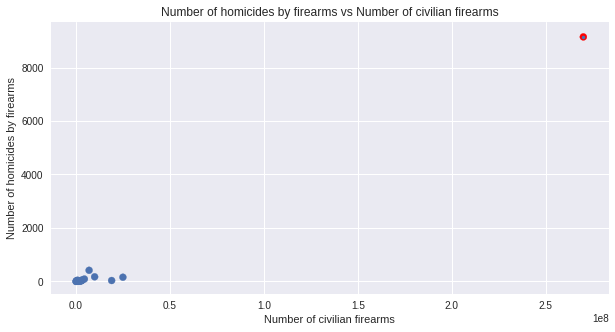

Number of homicides by firearms vs Number of civilian firearms, 
errors represent Poisson statistics.
The datapoint to the top right of the plot in the red is the USA, which has both the highest number of civilian firearms and highest number of homicides by firearms.
It is a significant outlier compared to the other countries (again).


In [12]:
colors = np.where(df_['Country Name']=='United States','r','C0')

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of homicides by firearms vs Number of civilian firearms')
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c=colors)

ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearms")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearms vs Number of civilian firearms. \n" + 
       "The datapoint to the top right of the plot in the red is the USA, " + 
       "which has both the highest number of civilian firearms and highest number of homicides by firearms.\n" + 
       "It is a significant outlier compared to the other countries (again)."
      )

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of homicides by firearms vs Number of civilian firearms')
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c=colors)
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', ecolor=colors)
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of homicides by firearms")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearms vs Number of civilian firearms, \n" + 
       "errors represent Poisson statistics.\n" +
       "The datapoint to the top right of the plot in the red is the USA, " + 
       "which has both the highest number of civilian firearms and highest number of homicides by firearms.\n" + 
       "It is a significant outlier compared to the other countries (again)."
      )

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


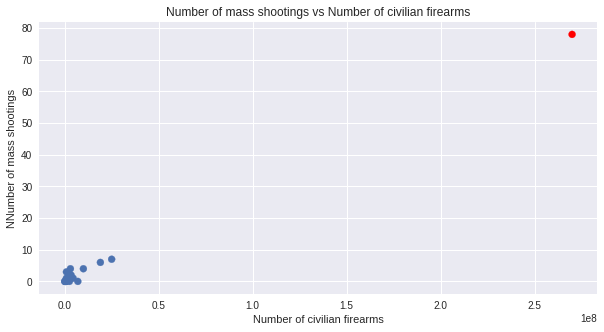

Number of mass shootings vs Number of civilian firearms. 
The datapoint to the top right of the plot in the red is the USA, which has both the highest number of civilian firearms and highest number of mass shootings.
It is a significant outlier compared to the other countries (again).


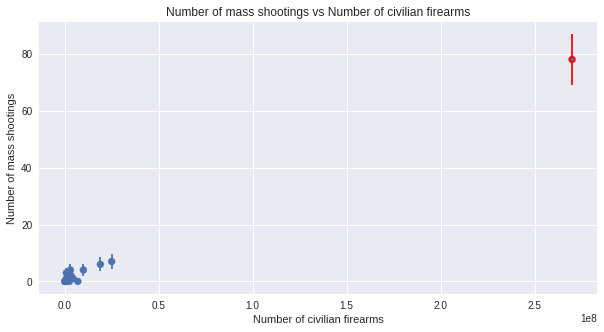

Number of mass shootings vs Number of civilian firearms, 
errors represent Poisson statistics.
The datapoint to the top right of the plot in the red is the USA, which has both the highest number of civilian firearms and highet number of mass shootings.
It is a significant outlier compared to the other countries (again).


In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shootings vs Number of civilian firearms')
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c=colors)

ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("NNumber of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Number of civilian firearms. \n" + 
       "The datapoint to the top right of the plot in the red is the USA, " + 
       "which has both the highest number of civilian firearms and highest number of mass shootings.\n" + 
       "It is a significant outlier compared to the other countries (again)."
      )

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
pl.title('Number of mass shootings vs Number of civilian firearms')
scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c=colors)
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', ecolor=colors)
ax.set_xlabel("Number of civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs Number of civilian firearms, \n" + 
       "errors represent Poisson statistics.\n" +
       "The datapoint to the top right of the plot in the red is the USA, " + 
       "which has both the highest number of civilian firearms and highet number of mass shootings.\n" + 
       "It is a significant outlier compared to the other countries (again)."
      )

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [14]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['Pop'] * 1e3 *1e4
df_['civilianFirearmspp'] = df_['Average total all civilian firearms'] / df_['Pop'] * 10

### OLS & WLS

In [15]:
#OLS
linModel = sm.OLS(endog=df_['shootingspp'],exog=sm.add_constant(df_['civilianFirearmspp'])).fit()

#WLS
yerr = np.sqrt(df_['shootingspp'])
yerr = np.where(yerr==0,0.46,yerr) # change 0's to arbitrary value ~to minimum value of yerr (0.46)
linModel2 = sm.WLS(endog=df_['shootingspp'],exog=df_['civilianFirearmspp'], weights = 1/yerr).fit()

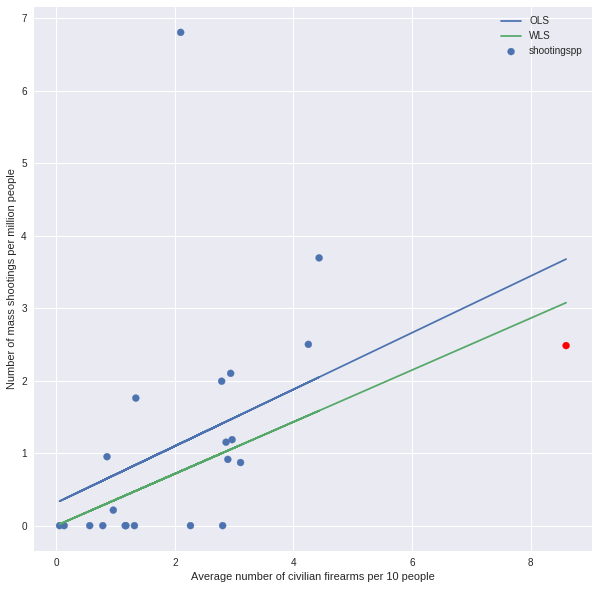

This shows the OLS and WLS regression fit lines to the data.


In [16]:
#plotting
fig = pl.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
#pl.title('Number of mass shootings vs Number of civilian firearms')
scatter = ax.scatter(df_['civilianFirearmspp'], df_['shootingspp'], c=colors)
pl.plot(df_['civilianFirearmspp'],linModel.fittedvalues, label='OLS')
pl.plot(df_['civilianFirearmspp'],linModel2.fittedvalues, label='WLS')
pl.legend()
ax.set_xlabel("Average number of civilian firearms per 10 people")
ax.set_ylabel("Number of mass shootings per million people")
ax.set_ylim()
pl.show()
print('This shows the OLS and WLS regression fit lines to the data.')

## Seaborn

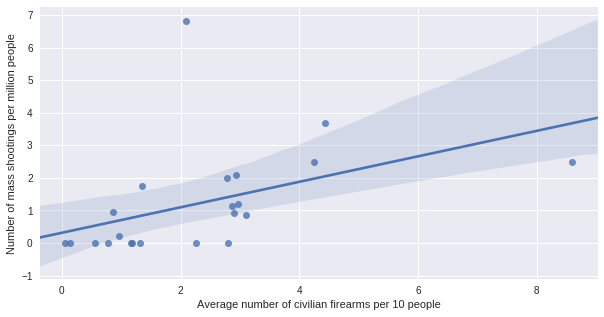

This shows the regression fit line to the data using the built-in Seaborn fuction, with an approximate error in shaded blue.


In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
sns.regplot(x='civilianFirearmspp', y='shootingspp', data=df_)
ax.set_xlabel("Average number of civilian firearms per 10 people")
ax.set_ylabel("Number of mass shootings per million people")
ax.set_ylim()
pl.show()
print("This shows the regression fit line to the data using the built-in Seaborn fuction, " +
      "with an approximate error in shaded blue.")

## numpy polyfit

In [18]:
m, b = np.polyfit(df_['civilianFirearmspp'],df_['shootingspp'], deg=1)

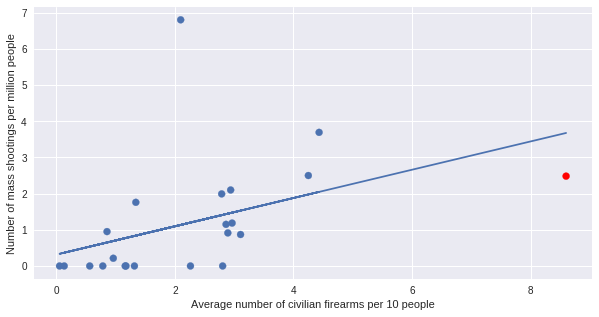

This shows the fit line through the data using the polyfit numpy function.


In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['civilianFirearmspp'], df_['shootingspp'], c=colors)
pl.plot(df_['civilianFirearmspp'],df_['civilianFirearmspp']*m+b)

ax.set_xlabel("Average number of civilian firearms per 10 people")
ax.set_ylabel("Number of mass shootings per million people")
ax.set_ylim()

pl.show()
print('This shows the fit line through the data using the polyfit numpy function.')

# Use the stsatsmodels.gaphics package to plot the influence plot.¶


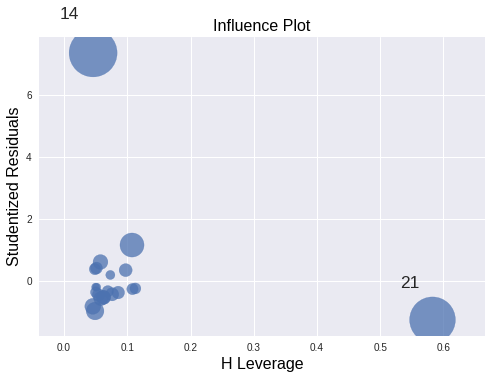

This influence plot show that the two data points that most greatly influence the modeling belong toindices 14 and 21, which are New Zealand and the USA. The USA stands out because it has extreme values on both parameters. New Zealand also has a strong influence because of it has a very small population, giving it a high ratio of shootings to population. 


In [20]:
sm.graphics.influence_plot(linModel, alpha  = 0.05, criterion="cooks")
pl.show()
print('This influence plot show that the two data points that most greatly influence the modeling belong to' +  
      'indices 14 and 21, which are New Zealand and the USA. The USA stands out because it has extreme values ' + 
      "on both parameters. New Zealand also has a strong influence because of it has a very small population, "  + 
      'giving it a high ratio of shootings to population. ' )